# Import software libraries and load the dataset #

In [1]:
# Import required libraries.
import sys                             # Read system parameters.
import shutil
import numpy as np                     # Work with multi-dimensional arrays and matrices.
from numpy.random import seed
import matplotlib as mpl               # Create 2D charts.
import matplotlib.pyplot as plt
import sklearn                         # Perform data mining and analysis.
import tensorflow                      # Train neural networks for deep learning.
import keras                           # Provide a frontend for TensorFlow.
from keras import datasets

# Summarize software libraries used.
print('Libraries used in this project:')
print('- Python {}'.format(sys.version))
print('- NumPy {}'.format(np.__version__))
print('- Matplotlib {}'.format(mpl.__version__))
print('- scikit-learn {}'.format(sklearn.__version__))
print('- TensorFlow {}'.format(tensorflow.__version__))
print('- Keras {}\n'.format(keras.__version__))

# Load the dataset.

(X_train, y_train), (X_test, y_test) = datasets.mnist.load_data()
print('Loaded {} training records.'.format(len(X_train.data)))
print('Loaded {} test records.'.format(len(X_test.data)))

# Uncomment the following two lines to make outcomes deterministic. Supply whatever seed values you wish.
#seed(1)
#tensorflow.random.set_seed(1)

Libraries used in this project:
- Python 3.10.2 (tags/v3.10.2:a58ebcc, Jan 17 2022, 14:12:15) [MSC v.1929 64 bit (AMD64)]
- NumPy 1.24.2
- Matplotlib 3.5.1
- scikit-learn 1.0.2
- TensorFlow 2.8.0
- Keras 2.8.0

Loaded 60000 training records.
Loaded 10000 test records.


# Get acquainted with the dataset

In [2]:
# Show dimensions of the training and testing sets and their labels
print('\nDimensions of the training set: {}'.format(X_train.shape))
print('Dimensions of the training labels: {}'.format(y_train.shape))
print('Dimensions of the test set: {}'.format(X_test.shape))
print('Dimensions of the test labels: {}'.format(y_test.shape))



Dimensions of the training set: (60000, 28, 28)
Dimensions of the training labels: (60000,)
Dimensions of the test set: (10000, 28, 28)
Dimensions of the test labels: (10000,)


# Visualize the data examples


Preview of the first 20 images:


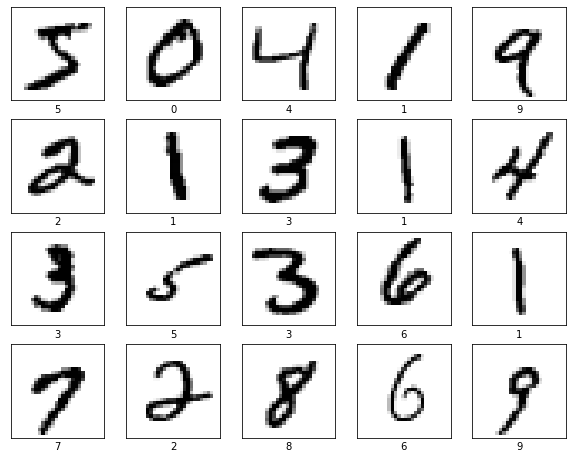

In [3]:
# Show a preview of the first 20 images
print('\nPreview of the first 20 images:')
plt.figure(figsize=(10,10))
for i in range(20):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(X_train[i], cmap=plt.cm.binary)
    plt.xlabel(y_train[i])
plt.show()

# Prepare the data for training with Keras

In [4]:
# Reshape arrays to add greyscale flag.
X_train = X_train.reshape((60000, 28, 28, 1))
X_test = X_test.reshape((10000, 28, 28, 1))


# One-hot encode the data for each label.
y_train = keras.utils.np_utils.to_categorical(y_train)
y_test = keras.utils.np_utils.to_categorical(y_test)

# Split the datasets

In [5]:
# Split the training and validation datasets and their labels.
X_train, X_valid = X_train[5000:], X_train[:5000]
y_train, y_valid = y_train[5000:], y_train[:5000]

# Build the CNN structure

In [6]:
# Import the required libraries.

# Create the model.
model = keras.models.Sequential()

# Add model layers as specified.
model.add(keras.layers.Conv2D(filters=64, kernel_size=2, padding='same', activation='relu', input_shape=(28,28,1)))
model.add(keras.layers.MaxPooling2D(pool_size=2))
model.add(keras.layers.Dropout(0.3))
model.add(keras.layers.Conv2D(filters=32, kernel_size=2, padding='same', activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=2))
model.add(keras.layers.Dropout(0.3))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(256, activation='relu'))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(10, activation='softmax'))


# Compile the model and summarize the layers

In [7]:
# Compile the model.
#   - Use the adam optimizer.
#   - Use categorical_crossentropy for the loss function.
#   - Use accuracy to measure model performance.
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


# Summarize the layers.
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 64)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 14, 14, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 32)        8224      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 32)         0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 7, 7, 32)          0

# Plot a graph of the model

In [8]:
# Install the required library.
!pip install graphviz pydot-ng

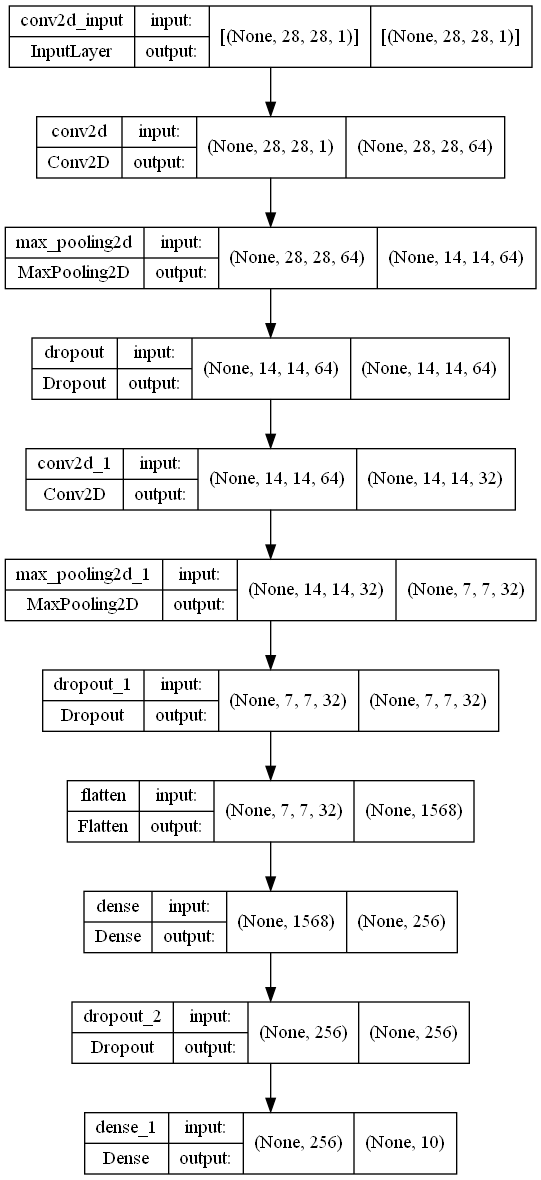

In [9]:
# Plot a graph of the model. 
from keras.utils.vis_utils import plot_model
import pydot_ng as pydot
pydot.find_graphviz()
import graphviz
plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)

# Train the model

In [10]:
# Train the model over 1 epoch.
model.fit(X_train, y_train, batch_size=64, epochs=1, validation_data=(X_valid, y_valid), verbose=1)

860/860 [==============================] - 40s 45ms/step - loss: 1.0961 - accuracy: 0.7913 - val_loss: 0.1199 - val_accuracy: 0.9664


# Evaluate the model on the test data

In [11]:
# Evaluate the model on the test data, showing loss and accuracy.
score = model.evaluate(X_test, y_test, verbose=0)
print('\nTest accuracy: {:.4f}'.format(score[1]))




Test accuracy: 0.9628


# Make predictions on the test data

In [12]:
# Make predictions on the test data.
y_hat = model.predict(X_test)


# Show the first 30 examples.
print('\nFirst 30 examples:')
print('Predicted probabilities:')
print(y_hat[:30].round(2))
print('\nPredicted labels:')
print(np.argmax(y_hat[:30], axis=1))
print('\nActual labels:')
print(np.argmax(y_test[:30], axis=1))




First 30 examples:
Predicted probabilities:
[[0.   0.   0.   0.   0.   0.   0.   1.   0.   0.  ]
 [0.   0.   1.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   1.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.99 0.   0.   0.   0.   0.   0.01 0.   0.   0.  ]
 [0.   0.   0.   0.   1.   0.   0.   0.   0.   0.  ]
 [0.   1.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.79 0.01 0.   0.   0.2  0.  ]
 [0.   0.   0.   0.   0.02 0.   0.   0.   0.   0.98]
 [0.   0.   0.   0.   0.   1.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.07 0.   0.92]
 [1.   0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.01 0.   0.   0.   0.   0.   0.98 0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.01 0.   0.99]
 [1.   0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   1.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   1.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.   0.   0.99]
 [0.   0.   0.   0.   0.   0.   0.   1.   0.   0.  ]
 

# Visualize the predictions for 30 examples


First 30 examples:


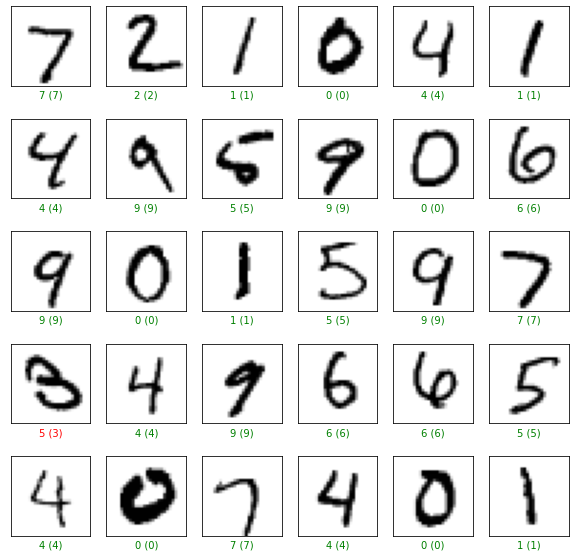

In [13]:
# Using the test set, show the first 30 predictions, highlighting any incorrect predictions in color.
print('\nFirst 30 examples:')
plt.figure(figsize=(10,10))
for i in range(30):
    plt.subplot(5,6,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_test[i].reshape(28,28), cmap=plt.cm.binary)
    predicted_label = np.argmax(y_hat[i])
    true_label = np.argmax(y_test[i])
    if predicted_label == true_label:
        color = 'green'
    else:
        color = 'red'
    plt.xlabel('{} ({})'.format(predicted_label, true_label), color=color)
plt.show()